In [ ]:
#https://www.baeldung.com/cs/svm-multiclass-classification
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

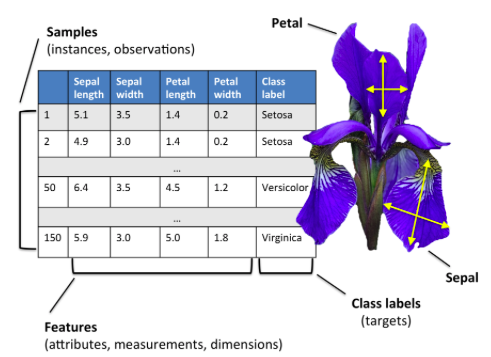

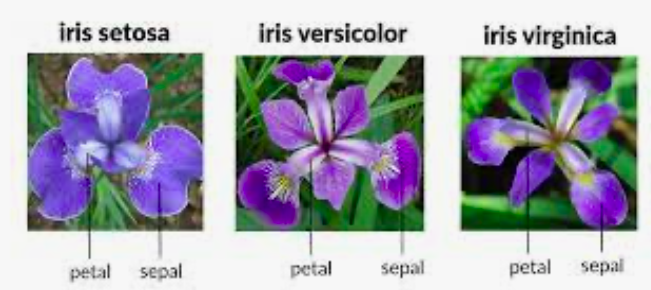

In [ ]:
iris = datasets.load_iris()

iris

In [ ]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
iris.target

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
rbf.fit(X_train, y_train)




poly = svm.SVC(kernel='poly', degree=3, C=1)
poly.fit(X_train, y_train)

In [ ]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

the accuracy and f1 scores for SVM with Polynomial kernel:

In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(poly_pred,y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

the accuracy and f1 scores for SVM with RBF kernel:

In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

In [ ]:
#ให้นิสิตแสดง confusion_matrix เพื่อแสดงผลการทำงานของ SVM with RBF kernel



# SVM works for regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

In [ ]:
df.dtypes

**เปลี่ยนชนิดข้อมูล**

In [ ]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

Remove column with object type

In [ ]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
svr = SVR(kernel = 'linear',C = 1000)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)


In [ ]:
#ให้นิสิตทำการ เตรียมข้อมูลของ test เพื่อให้อยู่ใน scale ที่พร้อมใช้งาน
#โดยตั้งชื่อตัวแปรเป็น X_test_std




In [ ]:
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)
#y_train_pred = svr.predict(X_train_std)

print(y_test_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

In [ ]:

plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()